In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv(r'C:\Users\Administrator\Desktop\DSP391m_cryptocurrency-price-prediction\data\processed\BTC\BTC_data.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# 1. Data Overview

In [3]:
print("1. Data Overview:")
print(df.info())
print("\nSample data:")
print(df.head())

1. Data Overview:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 2024-02-19 to 2024-07-10
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       159 non-null    float64
 1   High       159 non-null    float64
 2   Low        159 non-null    float64
 3   Close      159 non-null    float64
 4   Change     159 non-null    float64
 5   Amplitude  159 non-null    float64
 6   MA(7)      159 non-null    float64
 7   MA(25)     159 non-null    float64
 8   MA(99)     159 non-null    float64
 9   Vol(BTC)   159 non-null    float64
 10  Vol(USDT)  159 non-null    float64
dtypes: float64(11)
memory usage: 14.9 KB
None

Sample data:
                Open      High       Low     Close  Change  Amplitude  \
Date                                                                    
2024-02-19  52137.68  52488.77  51677.00  51774.73 -0.0070    0.01560   
2024-02-20  51774.74  52985.00  50760.37  52258.82  0.0093

In [4]:
print("\n2. Descriptive Statistical Analysis:")
print(df.describe())


2. Descriptive Statistical Analysis:
               Open          High           Low         Close      Change  \
count    159.000000    159.000000    159.000000    159.000000  159.000000   
mean   64799.154623  66088.925849  63342.002642  64801.809654    0.000568   
std     4799.381186   4785.289613   4714.055862   4707.544748    0.028711   
min    50744.150000  51548.540000  50521.000000  50744.150000   -0.083900   
25%    62410.005000  63572.740000  60730.710000  62410.000000   -0.013750   
50%    65463.990000  66903.630000  64237.500000  65300.630000   -0.001500   
75%    68372.820000  69600.905000  66787.500000  68332.720000    0.014700   
max    73072.400000  73777.000000  71333.310000  73072.410000    0.095300   

        Amplitude         MA(7)        MA(25)        MA(99)       Vol(BTC)  \
count  159.000000    159.000000    159.000000    159.000000     159.000000   
mean     0.042443  64826.559182  64198.312075  58716.554182   36821.380503   
std      0.025301   4637.902415   

In [5]:
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Change       0
Amplitude    0
MA(7)        0
MA(25)       0
MA(99)       0
Vol(BTC)     0
Vol(USDT)    0
dtype: int64


In [6]:
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates}")
df = df.drop_duplicates()

Duplicates: 15


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2024-02-19 to 2024-07-10
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       144 non-null    float64
 1   High       144 non-null    float64
 2   Low        144 non-null    float64
 3   Close      144 non-null    float64
 4   Change     144 non-null    float64
 5   Amplitude  144 non-null    float64
 6   MA(7)      144 non-null    float64
 7   MA(25)     144 non-null    float64
 8   MA(99)     144 non-null    float64
 9   Vol(BTC)   144 non-null    float64
 10  Vol(USDT)  144 non-null    float64
dtypes: float64(11)
memory usage: 13.5 KB
None


# 2. Price Trend and Volatility Analysis

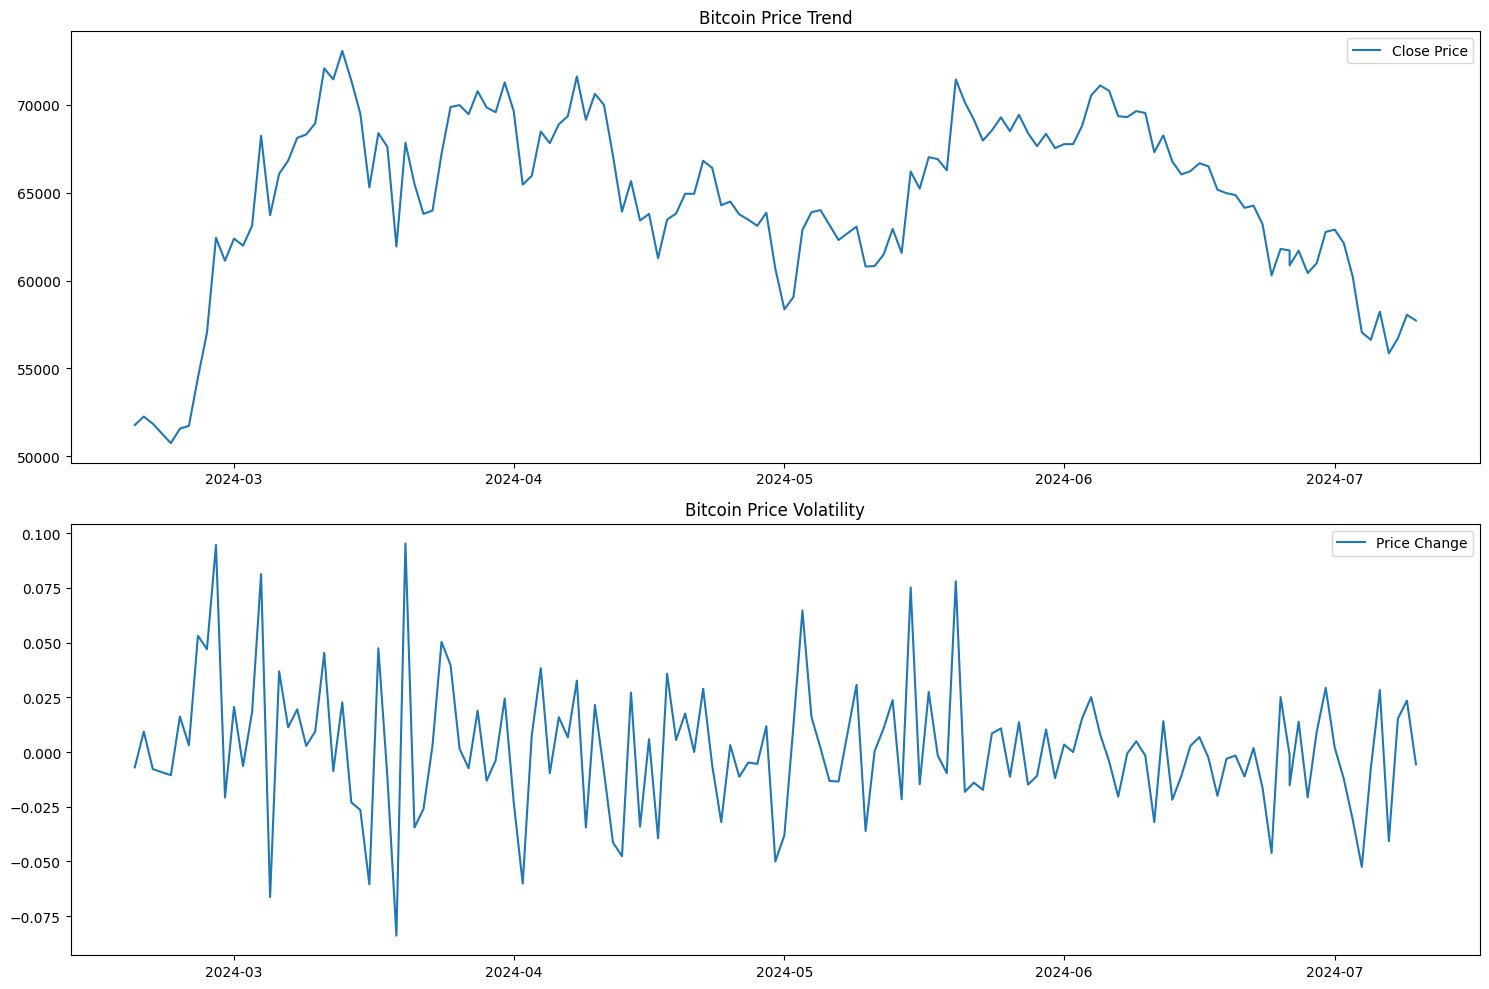

In [8]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Bitcoin Price Trend')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['Change'], label='Price Change')
plt.title('Bitcoin Price Volatility')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Trading Volume Analysis

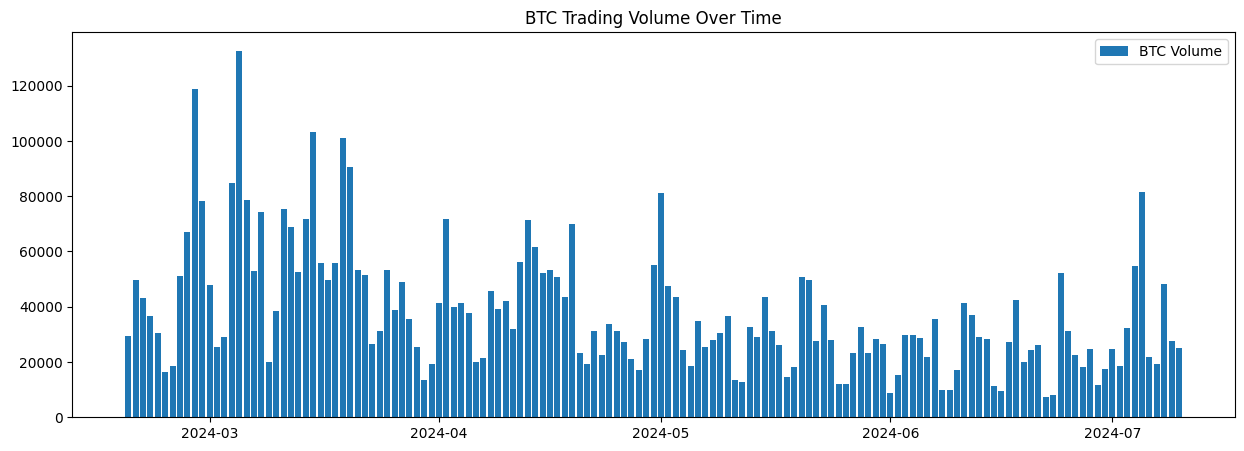

In [9]:
plt.figure(figsize=(15, 5))
plt.bar(df.index, df['Vol(BTC)'], label='BTC Volume')
plt.title('BTC Trading Volume Over Time')
plt.legend()
plt.show()

# 4. Correlation Analysis

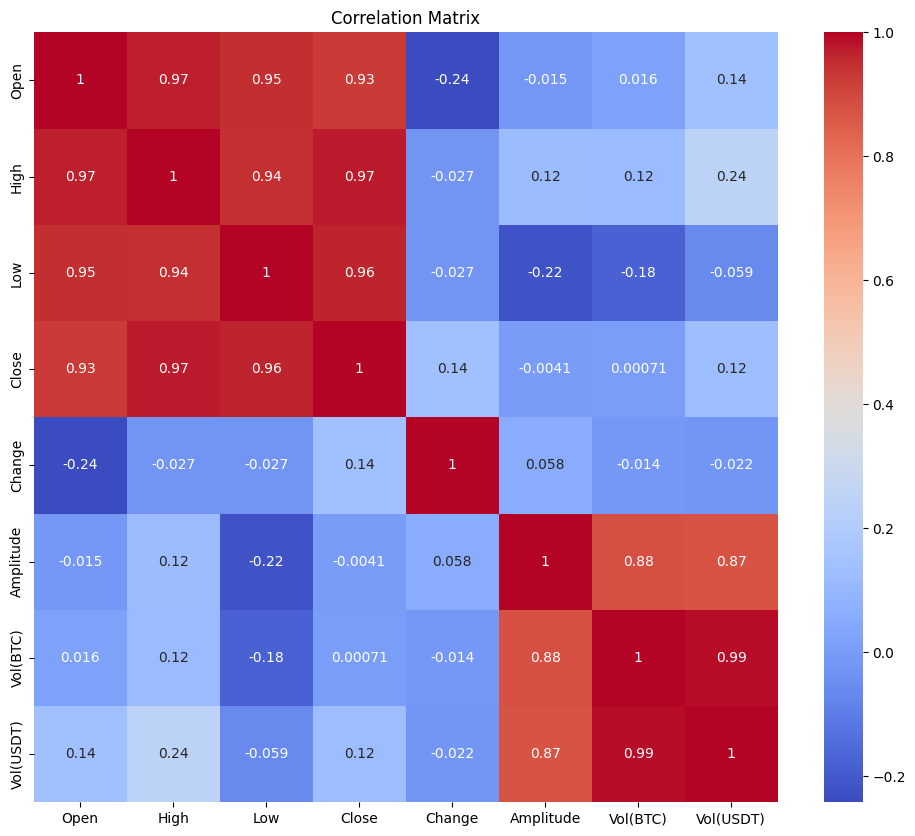

In [10]:
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Change', 'Amplitude', 'Vol(BTC)', 'Vol(USDT)']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5. Distribution Analysis

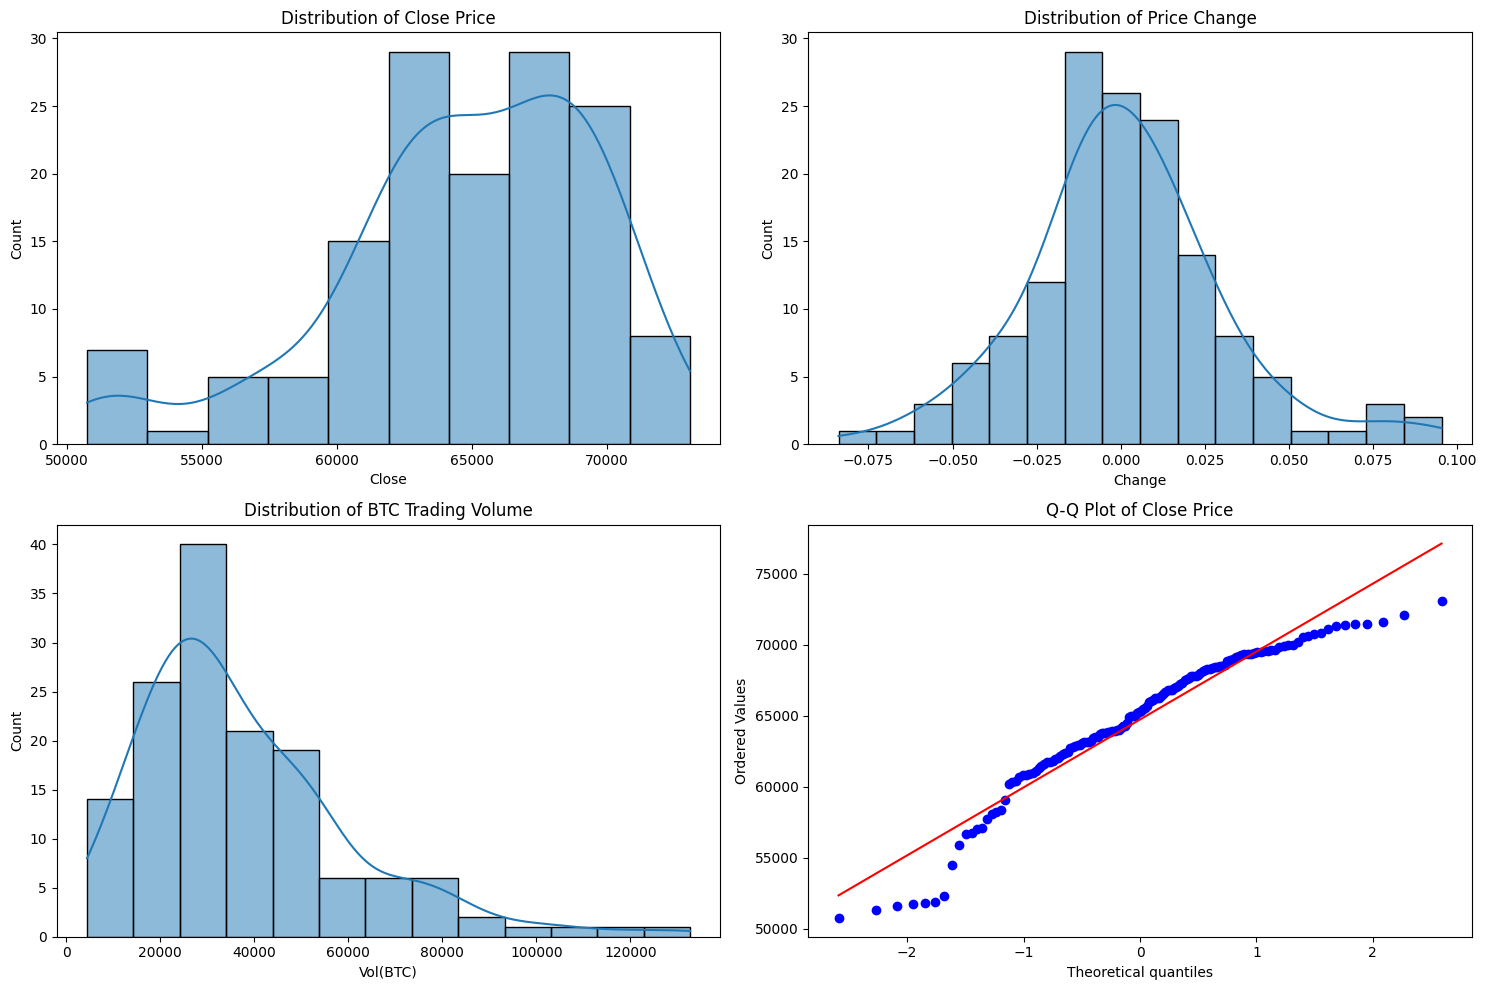

In [11]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Close Price')

plt.subplot(2, 2, 2)
sns.histplot(df['Change'], kde=True)
plt.title('Distribution of Price Change')

plt.subplot(2, 2, 3)
sns.histplot(df['Vol(BTC)'], kde=True)
plt.title('Distribution of BTC Trading Volume')

plt.subplot(2, 2, 4)
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Close Price')

plt.tight_layout()
plt.show()


# 6. Time-based Analysis

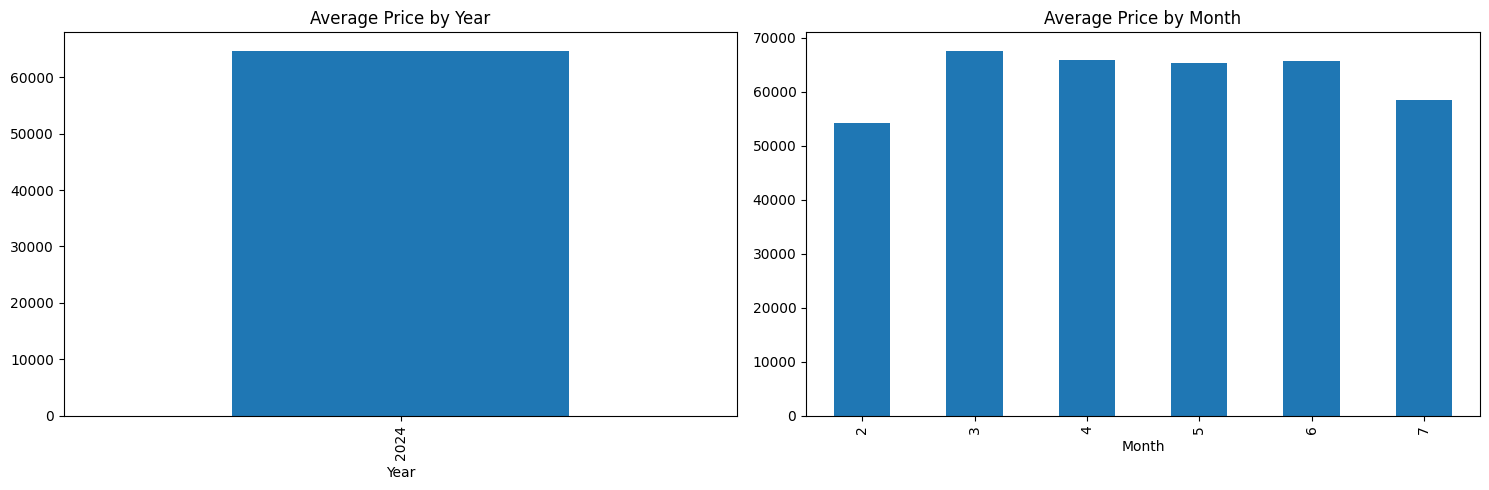

In [12]:
df['Year'] = df.index.year
df['Month'] = df.index.month

yearly_avg = df.groupby('Year')['Close'].mean()
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
yearly_avg.plot(kind='bar')
plt.title('Average Price by Year')

plt.subplot(1, 2, 2)
monthly_avg.plot(kind='bar')
plt.title('Average Price by Month')
plt.tight_layout()
plt.show()

# 7. Technical Indicator Analysis

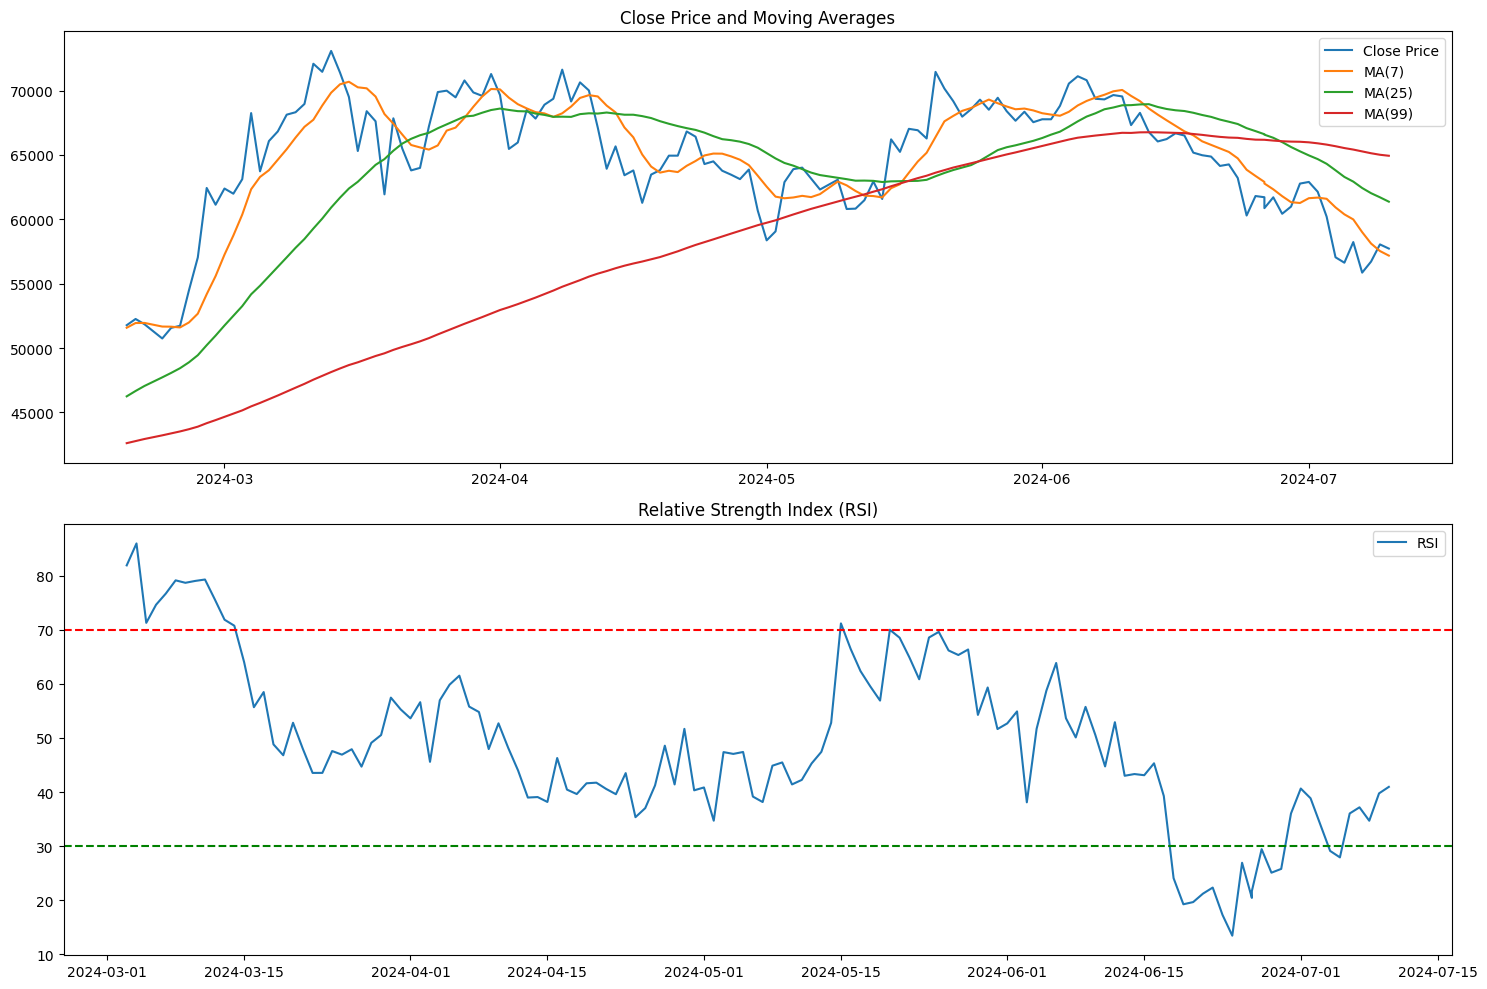

In [13]:
def calculate_rsi(data, periods=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['Close'])

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA(7)'], label='MA(7)')
plt.plot(df.index, df['MA(25)'], label='MA(25)')
plt.plot(df.index, df['MA(99)'], label='MA(99)')
plt.title('Close Price and Moving Averages')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--')
plt.axhline(y=30, color='g', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.tight_layout()
plt.show()

# Additional Analysis

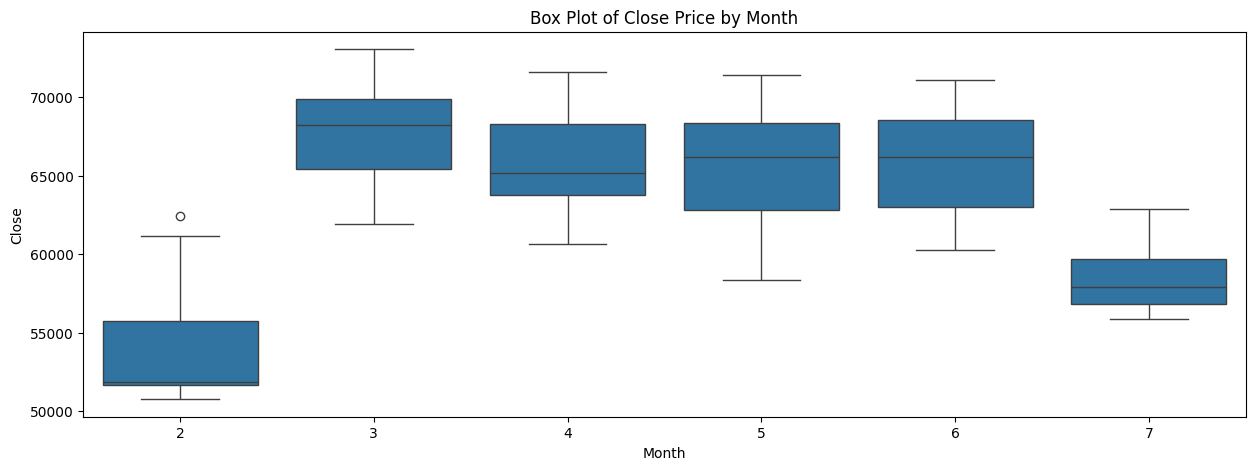

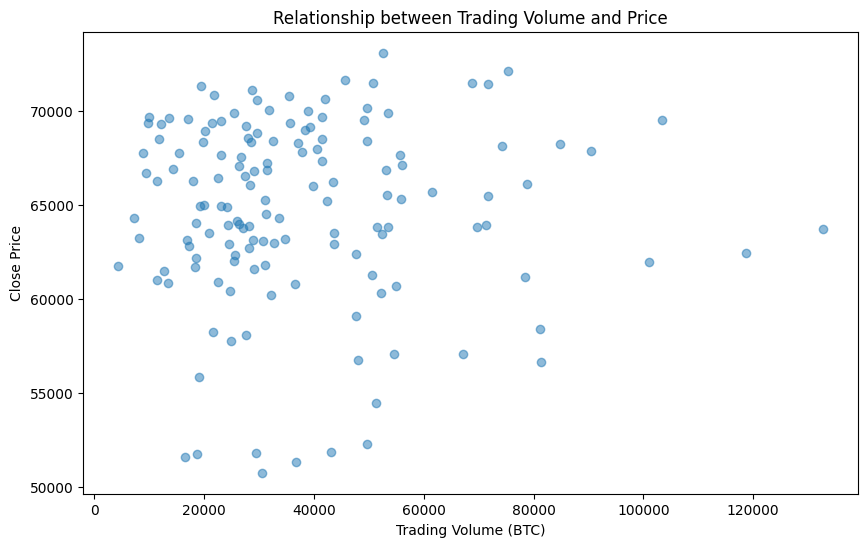

In [14]:
# Additional Analysis: Box plot for price by month
plt.figure(figsize=(15, 5))
sns.boxplot(x='Month', y='Close', data=df)
plt.title('Box Plot of Close Price by Month')
plt.show()

# Additional Analysis: Scatter plot between volume and price
plt.figure(figsize=(10, 6))
plt.scatter(df['Vol(BTC)'], df['Close'], alpha=0.5)
plt.title('Relationship between Trading Volume and Price')
plt.xlabel('Trading Volume (BTC)')
plt.ylabel('Close Price')
plt.show()

In [15]:
start_date = '2021-12-01'
end_date = '2024-07-01'

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the DataFrame using the index
df_filtered = df[(df.index >= start_date) & (df.index < end_date)]
df_filtered.head()

,Open,High,Low,Close,Change,Amplitude,MA(7),MA(25),MA(99),Vol(BTC),Vol(USDT),Year,Month,RSI
Date,,,,,,,,,,,,,,
2024-02-19,52137.68,52488.77,51677.00,51774.73,-0.0070,0.01560,51579.130,46251.070,42615.32,29535.0,1.540000e+09,2024,2,NaN
2024-02-20,51774.74,52985.00,50760.37,52258.82,0.0093,0.04300,51944.730,46668.490,42774.88,49614.0,2.575000e+09,2024,2,NaN
2024-02-21,52258.82,52366.80,50625.00,51849.39,-0.0078,0.03330,51952.480,47057.640,42939.50,43079.0,2.210000e+09,2024,2,NaN
2024-02-22,51773.62,51957.67,50573.00,51296.77,-0.0092,0.02665,51811.655,47391.615,43080.97,36812.5,1.884500e+09,2024,2,NaN
2024-02-23,51288.42,51548.54,50521.00,50744.15,-0.0106,0.02000,51670.830,47725.590,43222.44,30546.0,1.559000e+09,2024,2,NaN


In [16]:
df_filtered.drop(['Vol(BTC)', 'Year', 'Month'], axis=1, inplace=True)

df_filtered.to_csv(r'C:\Users\Administrator\Desktop\DSP391m_cryptocurrency-price-prediction\data\processed\BTC\BTC_price_dataset.csv', index=True)
df_filtered.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20360\1582626178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['Vol(BTC)', 'Year', 'Month'], axis=1, inplace=True)


,Open,High,Low,Close,Change,Amplitude,MA(7),MA(25),MA(99),Vol(USDT),RSI
Date,,,,,,,,,,,
2024-02-19,52137.68,52488.77,51677.00,51774.73,-0.0070,0.01560,51579.130,46251.070,42615.32,1.540000e+09,NaN
2024-02-20,51774.74,52985.00,50760.37,52258.82,0.0093,0.04300,51944.730,46668.490,42774.88,2.575000e+09,NaN
2024-02-21,52258.82,52366.80,50625.00,51849.39,-0.0078,0.03330,51952.480,47057.640,42939.50,2.210000e+09,NaN
2024-02-22,51773.62,51957.67,50573.00,51296.77,-0.0092,0.02665,51811.655,47391.615,43080.97,1.884500e+09,NaN
2024-02-23,51288.42,51548.54,50521.00,50744.15,-0.0106,0.02000,51670.830,47725.590,43222.44,1.559000e+09,NaN
